In [464]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [465]:
from google.colab.patches import cv2_imshow

In [466]:
import cv2 as cv

In [467]:
img = cv.imread('/content/sample_data/ktp.jpg')

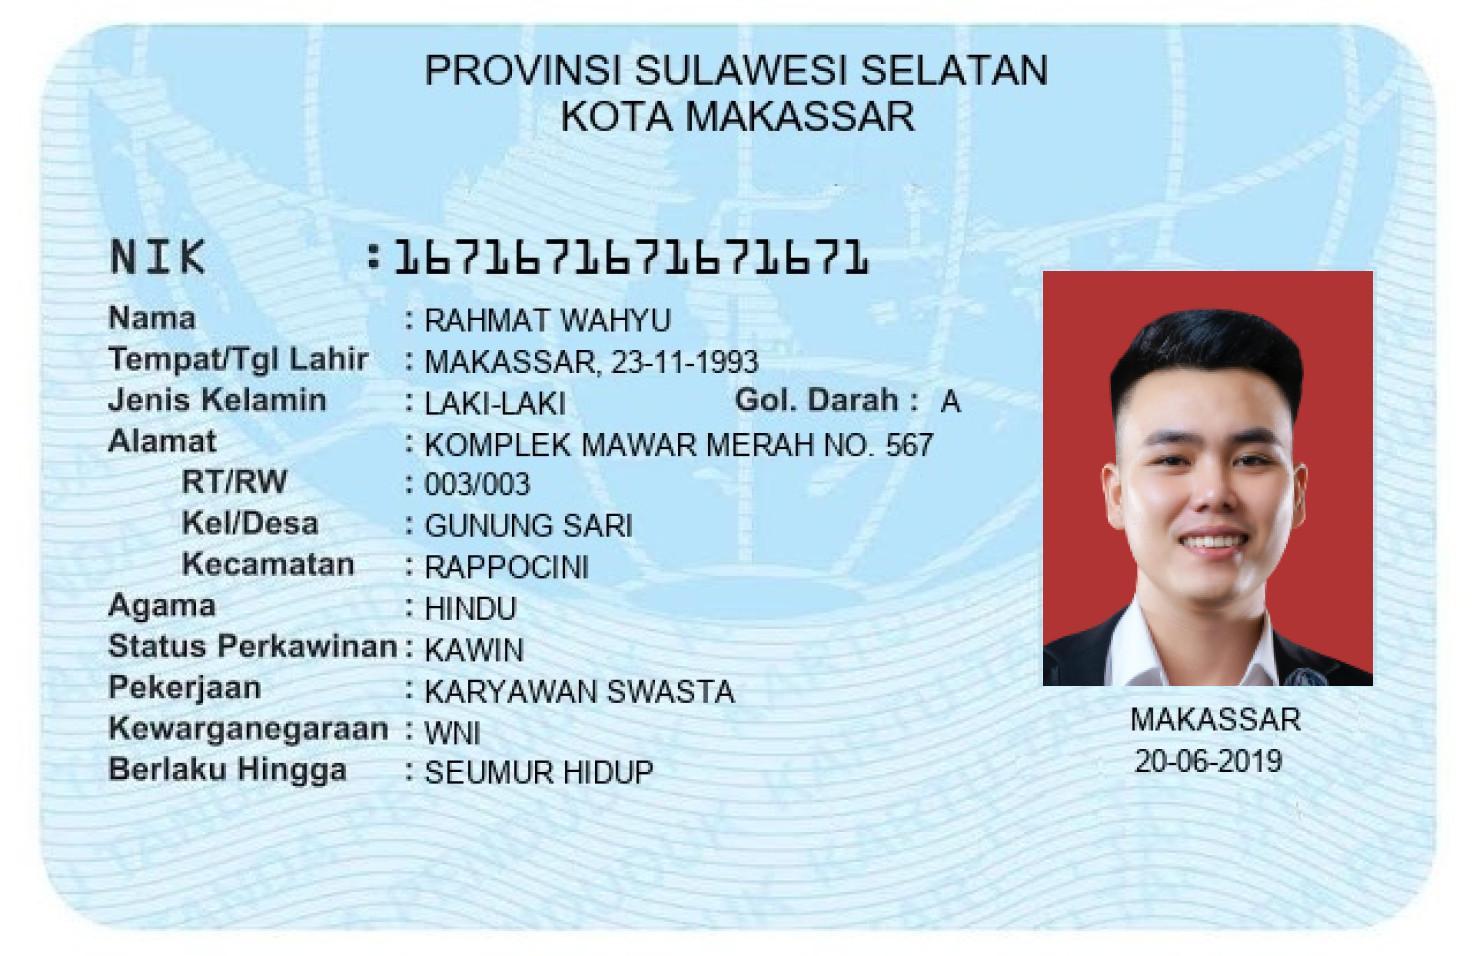

In [468]:
cv2_imshow(img)

In [469]:
imgg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

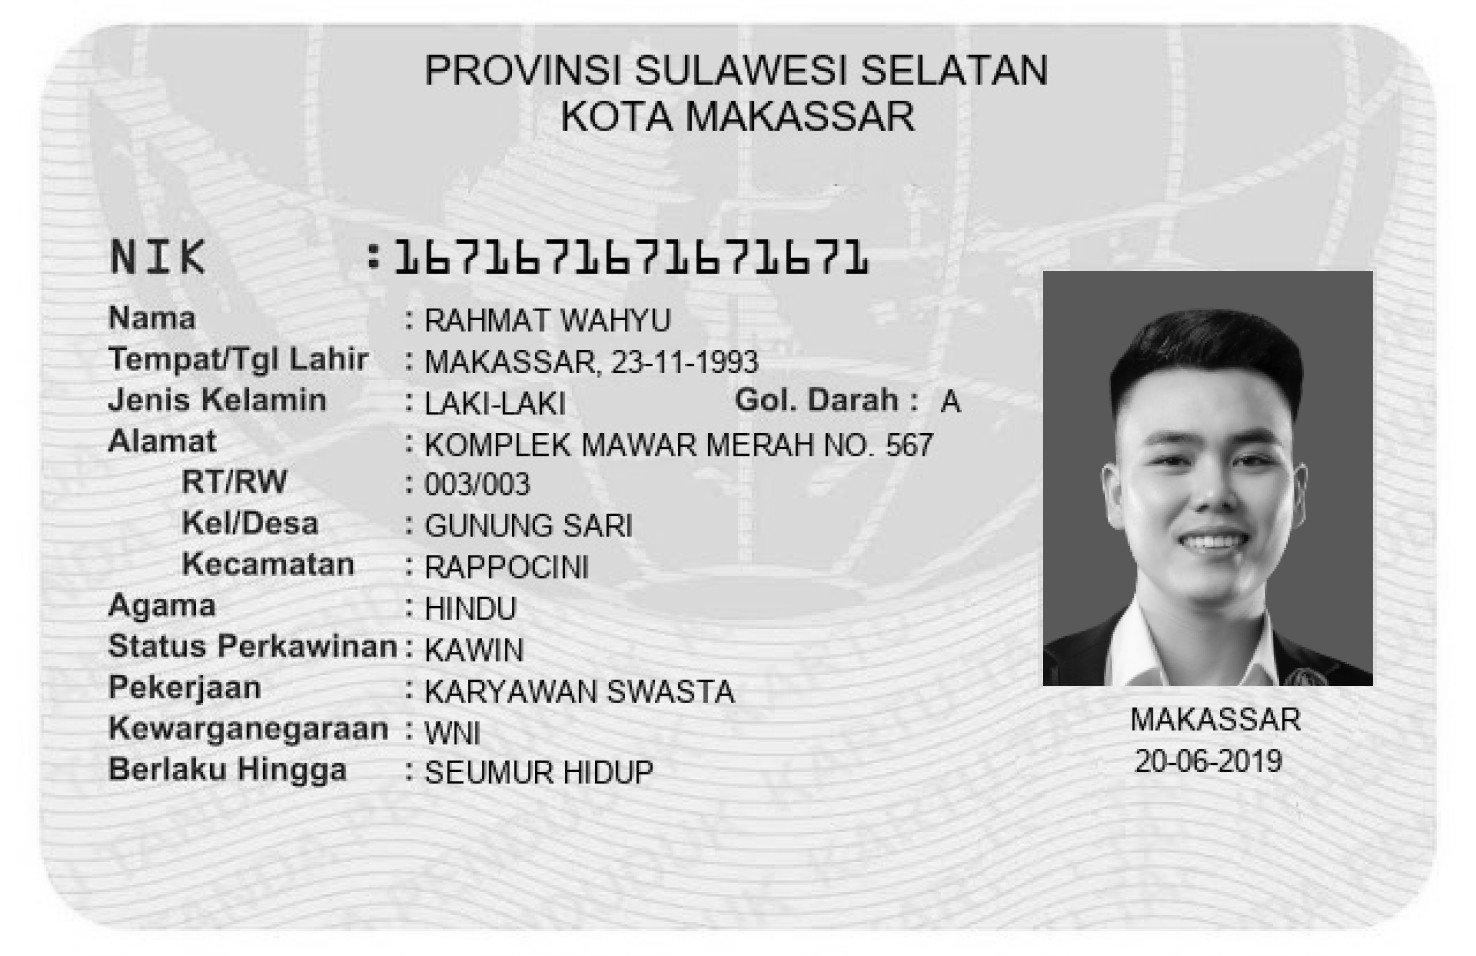

In [470]:
cv2_imshow(imgg)

In [471]:
kernel = np.ones((2,2),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
# erosion = cv.erode(img,kernel,iterations = 1)
# erosion = cv.erode(img,kernel,iterations = 1)

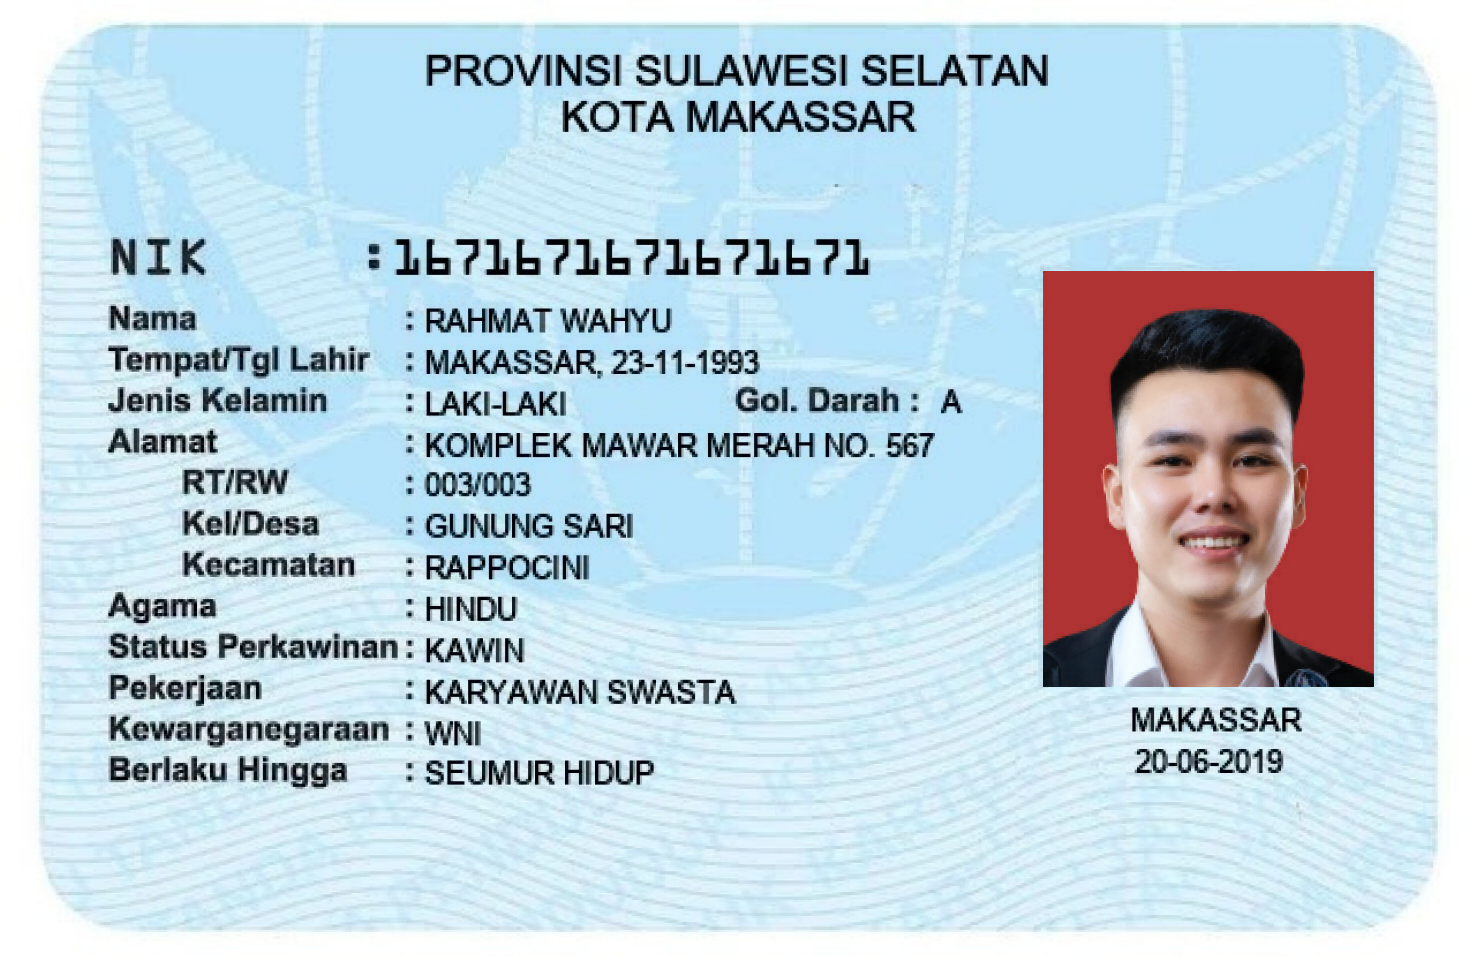

In [472]:
cv2_imshow(erosion)

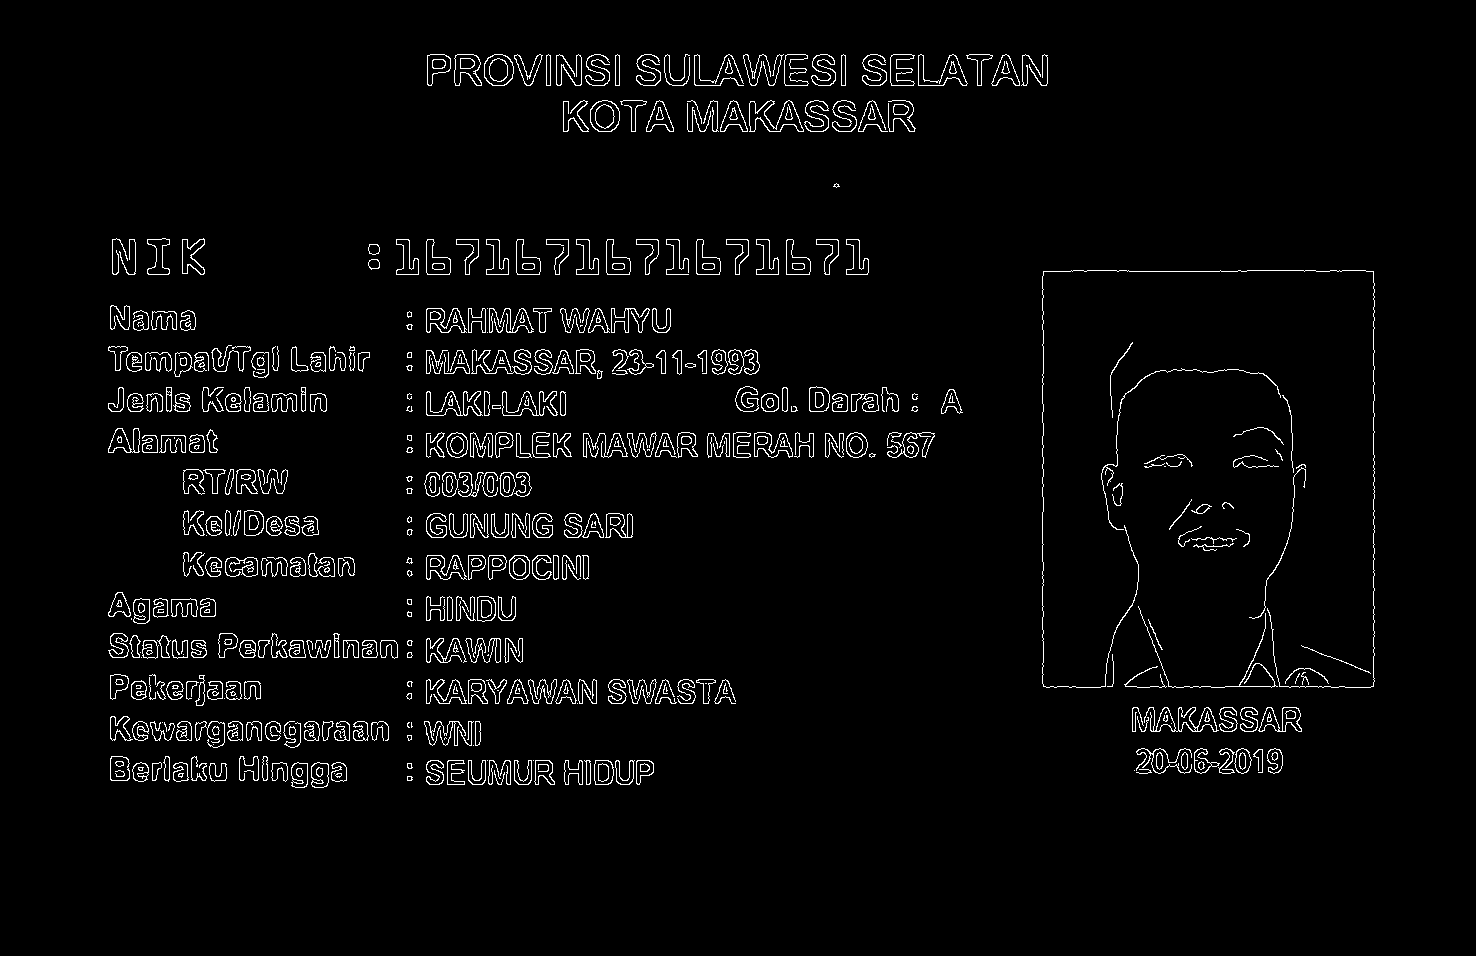

In [473]:
imgg = cv.cvtColor(erosion,cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(imgg, (5,5),0)

edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image

cv2_imshow(edges)


In [474]:
vertikalLine = np.sum(edges,axis=1)

In [475]:
vertikalLine

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       41055, 35700, 21930, 18870, 26265, 34425, 27030, 23970, 22950,
       22950, 27030, 23205, 23460, 24480, 35445, 23970, 24735, 25245,
       33660, 29325, 19380, 24735, 22950, 23715, 28050, 24735, 42840,
       27285, 19635, 20400, 23970, 67830,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 16065, 24735, 11985, 11730, 16575, 15045, 17850, 15555,
       15045, 16065, 17085, 13770, 15045, 13005, 16320, 14280, 14025,
       14025, 19635, 19890, 11985, 13005, 15045, 12240, 25245, 17850,
       20655, 17085,

In [476]:
lists = []
isCompleted = False
thresh = 10000
for index,j in enumerate(vertikalLine):
  if j>thresh and not isCompleted:
    a=[]
    a.append(index)
    isCompleted = True
  if isCompleted and j<thresh:
    a.append(index)
    isCompleted = False
    lists.append(a)

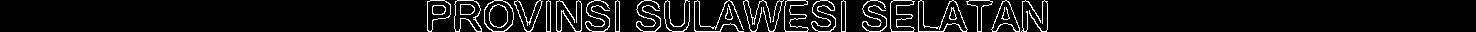

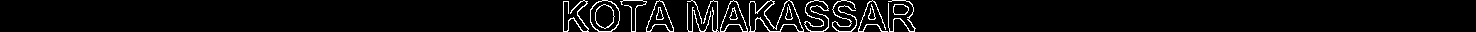

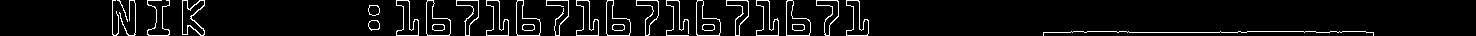

In [477]:
for i,j in lists:
  if(j-i)>10:
    cv2_imshow(edges[i:j,:])
    print()

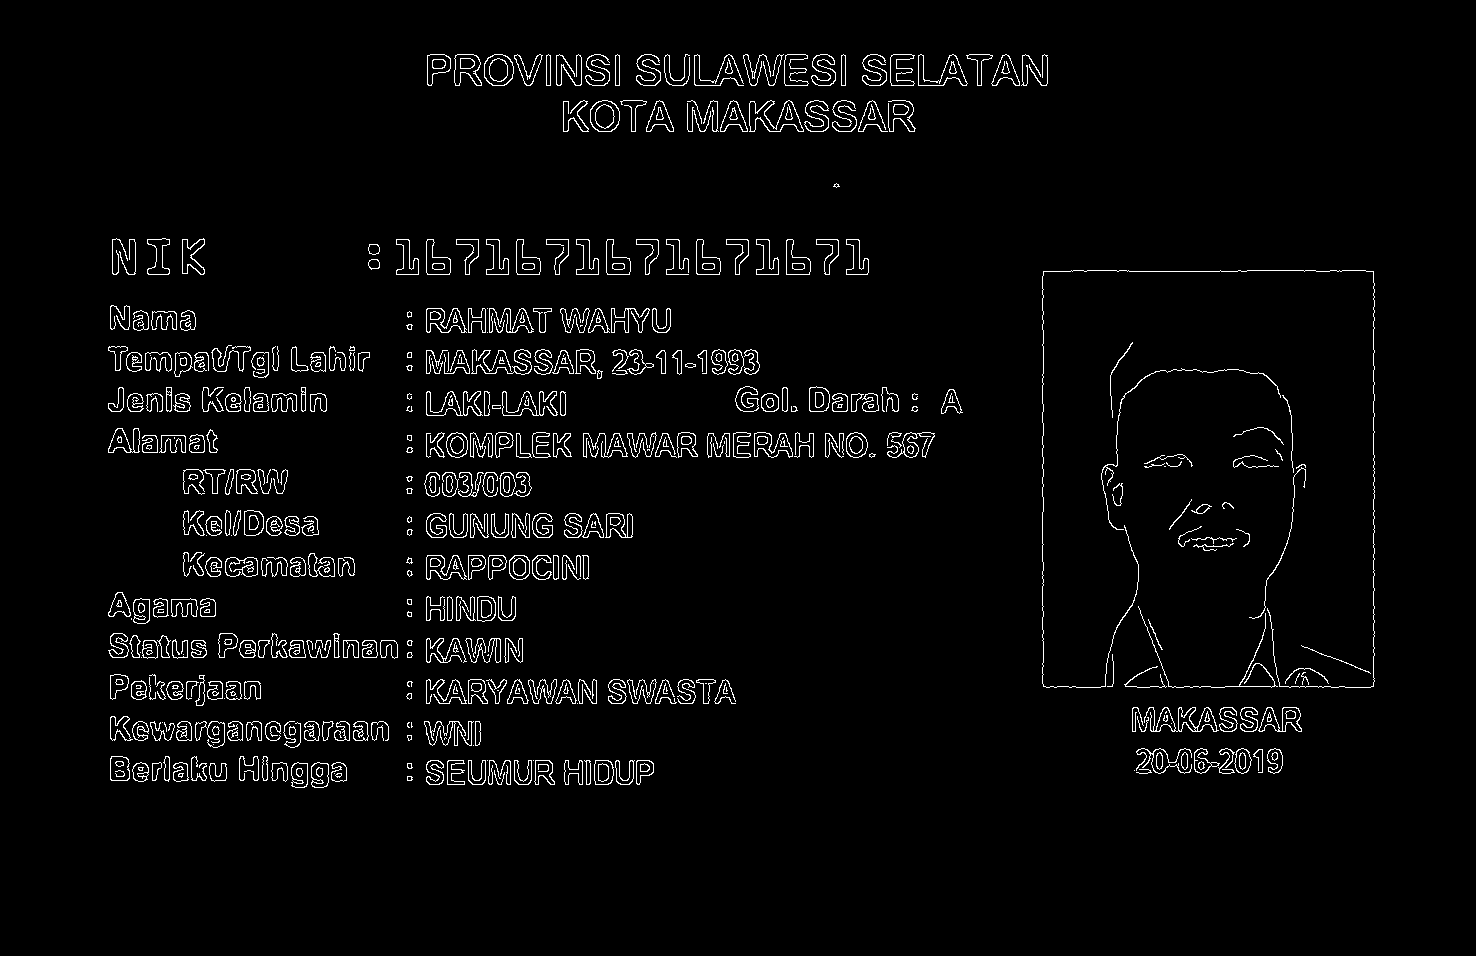

In [478]:
cv2_imshow(edges)

In [479]:
lists[2]

[239, 275]

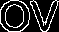

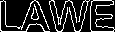

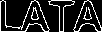

In [480]:
listsh = []
for i,k in lists:
  if (k-i)>10:
    edgess = edges[i:k,:]
    isCompleted = False
    thresh = 200
    horizontal = np.sum(edgess,axis=0)
    for index,j in enumerate(horizontal):
      if j>thresh and not isCompleted:
        a=[]
        a.append(index)
        isCompleted = True
      if isCompleted and j<thresh:
        a.append(index)
        isCompleted = False
        listsh.append(a)
  break
for i,j in listsh:
  cv2_imshow(edgess[:,i:j])
  print()